In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import splat

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [56]:
df = pd.read_csv('train_variablenoise.csv') #previously: new_train3.csv
test = pd.read_csv('test.standardspt_removedoutliers85-245.csv')
#test = test.sample(frac = 1)

In [57]:
wav_01 = [(0.85, 0.95), (1.05, 1.15), (1.15, 1.25),(1.2, 1.35), (1.25,1.35),
                        (1.42,1.52), (1.52,1.62),(1.62,1.72), (1.72,1.8), (1.95,2.05), (2.05,2.15), (2.15,2.25),(2.25,2.35),
                        (2.35,2.45)] #h = np.arange(1.2, 1.35)
wav_02 = [(0.85, 1.05), (1.05,1.25),(1.25,1.35), (1.42, 1.62),
                     (1.62, 1.8), (1.95,2.15),(2, 2.25), (2.15,2.35)] # k = (2, 2.25)
wav_035 = [(1,1.35),(1.42,1.8),(1.95,2.25)] # yj =(0.75, 1.05)
wav_04 = [(0.85,1.35),(1.95,2.45)]
wav_005 = [(0.85, 0.90),(0.90, 0.95),(0.95, 1.0),(1.0, 1.05),(1.05, 1.10), (1.10, 1.15), (1.15, 1.20),(1.20, 1.25),
                       (1.25,1.30), (1.30,1.35),(1.42,1.52), (1.52,1.62),(1.62,1.67),(1.67,1.72), (1.72,1.8), (1.95,2.0),(2.0,2.05),
                       (2.05,2.10),(2.10,2.15),(2.15,2.20),(2.20,2.25),(2.25,2.30),(2.30,2.35),(2.35,2.40),(2.40,2.45)]
wav_002 = [(0.85, 0.87),(0.87, 0.89),(0.89, 0.91),(0.91, 0.93),(0.93, 0.95),(0.95, 0.97),(0.97, 0.99),(0.99, 1.01),
(1.01, 1.03),(1.03, 1.05),(1.05, 1.07),(1.07, 1.09),(1.09, 1.11), (1.11, 1.13),(1.13,1.15),(1.15, 1.17),
(1.17, 1.19),(1.19, 1.21),(1.21, 1.23),(1.23, 1.25),(1.25, 1.27),(1.27, 1.29),(1.29, 1.31),(1.31, 1.33),
(1.42,1.44),(1.44,1.46),(1.46,1.48),(1.48,1.50),(1.50,1.52), (1.52,1.54),(1.54,1.56),(1.56,1.58),
(1.58,1.60),(1.60,1.62),(1.62,1.64),(1.64,1.66),(1.66,1.68),(1.68,1.7),(1.7,1.72),(1.72,1.74),(1.74,1.76),
(1.76,1.78),(1.78,1.80),(1.95,1.97),(1.97,1.99),(2.01,2.03),(2.03,2.05),(2.05,2.07),(2.07,2.09),
(2.09,2.11),(2.11,2.13),(2.13,2.15),(2.15,2.17),(2.17,2.19),(2.19,2.21),(2.21,2.23),(2.23,2.25),(2.25,2.27),
(2.27,2.29),(2.29,2.31),(2.31,2.33),(2.33,2.35),(2.35,2.37),(2.37,2.39),(2.39,2.41),(2.41,2.43),(2.43,2.45)]
#J band: 1.1-1.35
#H band 1.5-1.8
#K band: 1.95-2.4


In [58]:
df.drop(columns=['(0.81, 0.83)','(0.83, 0.85)','(0.8, 0.85)'],inplace=True)
test.drop(columns=['(0.81, 0.83)','(0.83, 0.85)','(0.8, 0.85)'],inplace=True)

In [59]:
wav_002 = [str(tup) for tup in wav_002] + ['spectral_type']
wav_005 = [str(tup) for tup in wav_005] + ['spectral_type']

In [60]:
df = df[wav_002]
test = test[wav_002]

In [61]:
# Sample code to drop columns from 'test' DataFrame to match the columns in 'df' DataFrame
columns_to_keep = set(df.columns)
columns_to_drop = [col for col in test.columns if col not in columns_to_keep]

# Dropping the columns
test = test.drop(columns=columns_to_drop)

# Now test_dropped should have the same columns as df
test.shape, df.shape

((316, 68), (2400, 68))

In [62]:
def remove_dot_zero(s):
    return s[:-2] if s[-2:] == '.0' else s

In [63]:
df['spectral_type'] = [remove_dot_zero(s) for s in df['spectral_type']]
test['spectral_type'] = [remove_dot_zero(s) for s in test['spectral_type']]

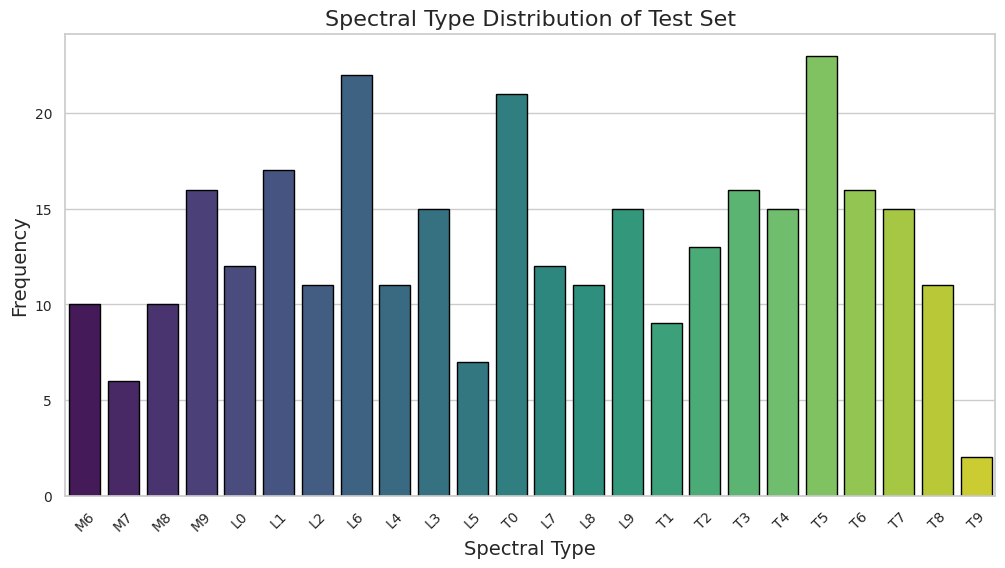

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set seaborn style
sns.set(style="whitegrid")

counted_spectral_types = Counter(test['spectral_type'])

plt.figure(figsize=(12, 6))

# Plot the histogram with custom colors and edge color
ax = sns.barplot(x=list(counted_spectral_types.keys()), y=list(counted_spectral_types.values()), palette="viridis", edgecolor="black")

# Customize the plot labels and title
plt.xlabel("Spectral Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Spectral Type Distribution of Test Set", fontsize=16)

# Customize the ticks
ax.tick_params(axis="x", labelsize=10, rotation=45)
ax.tick_params(axis="y", labelsize=10)

# Display the plot
plt.show()

In [65]:
y = df.spectral_type # we are predicting SpT

df_features = df.columns[:-1]
X = df[df_features]

In [66]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
for n_estimators in [100, 200, 300, 400, 500]: #finding the right number of decision-trees
    forest_model = RandomForestClassifier(n_estimators, random_state=42)
    forest_model.fit(train_X, train_y)
    y_preds = forest_model.predict(val_X)
    print("Model accuracy score with {0:0.0f} decision-trees : {1:0.6f}". format(n_estimators, accuracy_score(val_y , y_preds)))

Model accuracy score with 100 decision-trees : 0.997917
Model accuracy score with 200 decision-trees : 0.997917
Model accuracy score with 300 decision-trees : 0.997917
Model accuracy score with 400 decision-trees : 0.997917
Model accuracy score with 500 decision-trees : 0.997917


In [68]:
forest_model = RandomForestClassifier(n_estimators=200, random_state=42)
forest_model.fit(train_X, train_y)
feature_scores = pd.Series(forest_model.feature_importances_, index=df_features).sort_values(ascending=False)

feature_scores #REMOVE DUPLICATES!

(0.99, 1.01)    0.033926
(1.01, 1.03)    0.030023
(1.42, 1.44)    0.027689
(0.89, 0.91)    0.025788
(0.91, 0.93)    0.024984
                  ...   
(1.54, 1.56)    0.004598
(1.21, 1.23)    0.004543
(1.07, 1.09)    0.003681
(1.27, 1.29)    0.000913
(1.25, 1.27)    0.000714
Length: 67, dtype: float64

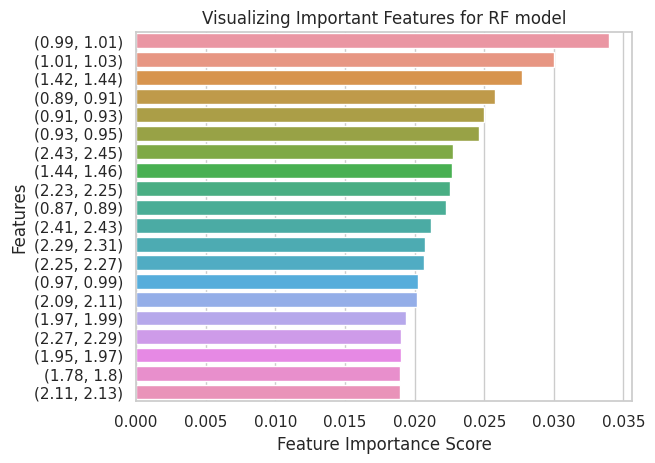

In [69]:
# Assuming feature_scores is a pandas Series or similar object,
# sort it in descending order (most important features first)
feature_scores_sorted = feature_scores.sort_values(ascending=False)

# Concatenate the top 5 and bottom 5 feature scores
selected_features = feature_scores_sorted.head(20)

sns.barplot(x=selected_features, y=selected_features.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features for RF model")

# Visualize the graph
plt.show()

In [70]:
#pd.set_option('display.max_columns', None)
test[test.isnull().any(axis=1)]
#0.85-0.87 is nan for index 271

,"(0.85, 0.87)","(0.87, 0.89)","(0.89, 0.91)","(0.91, 0.93)","(0.93, 0.95)","(0.95, 0.97)","(0.97, 0.99)","(0.99, 1.01)","(1.01, 1.03)","(1.03, 1.05)",...,"(2.27, 2.29)","(2.29, 2.31)","(2.31, 2.33)","(2.33, 2.35)","(2.35, 2.37)","(2.37, 2.39)","(2.39, 2.41)","(2.41, 2.43)","(2.43, 2.45)",spectral_type


In [71]:
test.isnull().sum()
test.dropna(inplace=True)

In [72]:
test_X = test[df_features]
test_y = test['spectral_type']

In [73]:
forest_model = RandomForestClassifier(n_estimators=400,random_state=42)
forest_model.fit(train_X, train_y)
y_preds = forest_model.predict(test_X)
print("Model accuracy score with 200 decision-trees", accuracy_score(test_y , y_preds))

Model accuracy score with 200 decision-trees 0.7943037974683544


In [74]:
def spectral_type_accuracy(y_true, y_pred):
    """
    Calculates the accuracy of a spectral type classification model with plus minus 1 spectral type uncertainty.

    Args:
    y_true (array-like): True spectral types of the data in string format (e.g. 'M0', 'L1', etc.).
    y_pred (array-like): Predicted spectral types of the data in string format.

    Returns:
    accuracy (float): Accuracy of the model with plus minus 1 spectral type uncertainty.
    """
    # Define a dictionary that maps each spectral type string to an integer value
    type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}
    # Initialize the count of correct predictions to 0
    correct_predictions = 0

    # Iterate over the true and predicted spectral types
    for true_type, pred_type in zip(y_true, y_pred):

        # Convert the spectral type strings to integers using the type_to_int dictionary
        true_type_int = type_to_int[true_type]
        pred_type_int = type_to_int[pred_type]

        # Check if the predicted spectral type is within plus minus 1 spectral type of the true spectral type
        if (pred_type_int >= true_type_int - 1) and (pred_type_int <= true_type_int + 1):

            # Increment the count of correct predictions
            correct_predictions += 1

    # Calculate the accuracy as the ratio of correct predictions to the total number of predictions
    accuracy = correct_predictions / len(y_true)

    return accuracy

In [75]:
spectral_type_accuracy(test_y,y_preds)

0.9651898734177216

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machines

In [77]:
svc = SVC()
svc.fit(train_X, train_y)
Y_pred = svc.predict(test_X)
train_accuracy_svc = round(svc.score(train_X, train_y) * 100, 2)
test_accuracy_svc = round(svc.score(test_X, test_y) * 100, 2)
train_accuracy_svc,test_accuracy_svc


(97.45, 80.38)

In [78]:
spectral_type_accuracy(test_y,Y_pred)

0.9778481012658228

# k-Nearest Neighbors

In [79]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_X, train_y)
Y_pred = knn.predict(test_X)
train_accuracy_knn = round(knn.score(train_X, train_y) * 100, 2)
test_accuracy_knn = round(knn.score(test_X, test_y) * 100, 2)
train_accuracy_knn ,test_accuracy_knn

(99.84, 83.23)

In [80]:
spectral_type_accuracy(test_y,Y_pred)

0.9841772151898734

In [81]:
# Hyperparameter Tuning/Searching

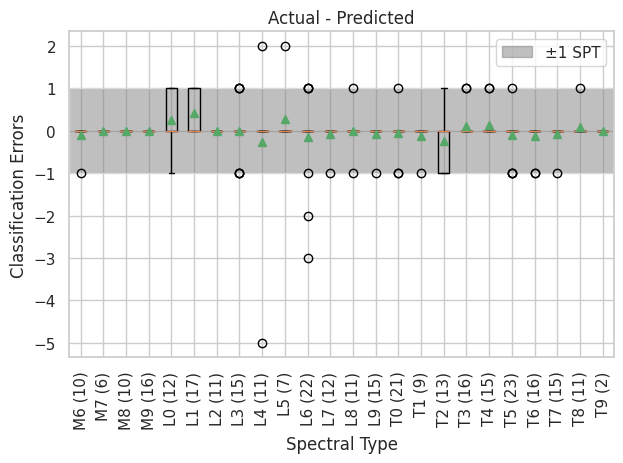

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# def assign_dwarf_type(spectral_type):
#     if spectral_type in normal_list:
#         return 0
#     elif spectral_type in dsd_list:
#         return 1
#     elif spectral_type in sd_list:
#         return 2
#     elif spectral_type in esd_list:
#         return 3
#     elif spectral_type in vlg_list:
#         return 4
#     elif spectral_type in intg_list:
#         return 5
#     else:
#         return -1  # return some default value for spectral types not included in your lists
# Convert the spectral types to integers
type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}

spectral_types = [
               'M6', 'M7', 'M8', 'M9', 'L0', 'L1',
               'L2', 'L3', 'L4', 'L5', 'L6', 'L7',
               'L8', 'L9', 'T0', 'T1', 'T2', 'T3',
               'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
# Convert the actual and predicted spectra to integers
test_y_int = np.array([type_to_int[s] for s in test_y])
y_pred_int_knn = np.array([type_to_int[s] for s in Y_pred])
y_pred_int_rf = np.array([type_to_int[s] for s in y_preds])

# Collect the errors for each subtype and count the number of objects in each subtype
errors_list_knn = []
errors_list_rf = []
subtype_counts = []
for i, s in enumerate(spectral_types):
    indices = np.where(test_y_int == type_to_int[s])[0]
    if len(indices) > 0:
        errors_knn = test_y_int[indices] - y_pred_int_knn[indices]
        errors_rf = test_y_int[indices] - y_pred_int_rf[indices]
        errors_list_knn.append(errors_knn)
        errors_list_rf.append(errors_rf)
        subtype_counts.append(len(indices))
    else:
        errors_list_knn.append(np.array([]))
        errors_list_rf.append(np.array([]))
        subtype_counts.append(0)

# Update the labels with the number of objects in each subtype
updated_labels = [f"{s} ({count})" for s, count in zip(spectral_types, subtype_counts)]

# Plot the results as a box plot
fig, ax = plt.subplots()
ax.boxplot(errors_list_knn, showmeans=True)
ax.set_xticklabels(updated_labels, rotation=90)
ax.set_xlabel('Spectral Type', fontsize=12)
ax.set_ylabel('Classification Errors', fontsize=12)
ax.set_title('Actual - Predicted')
# Add a grey shaded area that covers from -1 to 1 on the y-axis
ax.axhspan(-1, 1, facecolor='grey', alpha=0.5)
legend_patch = Patch(color='grey', alpha=0.5, label='±1 SPT')

# Add legend to the plot
ax.legend(handles=[legend_patch])
plt.tight_layout()
plt.savefig('boxplot.pdf')
plt.show()


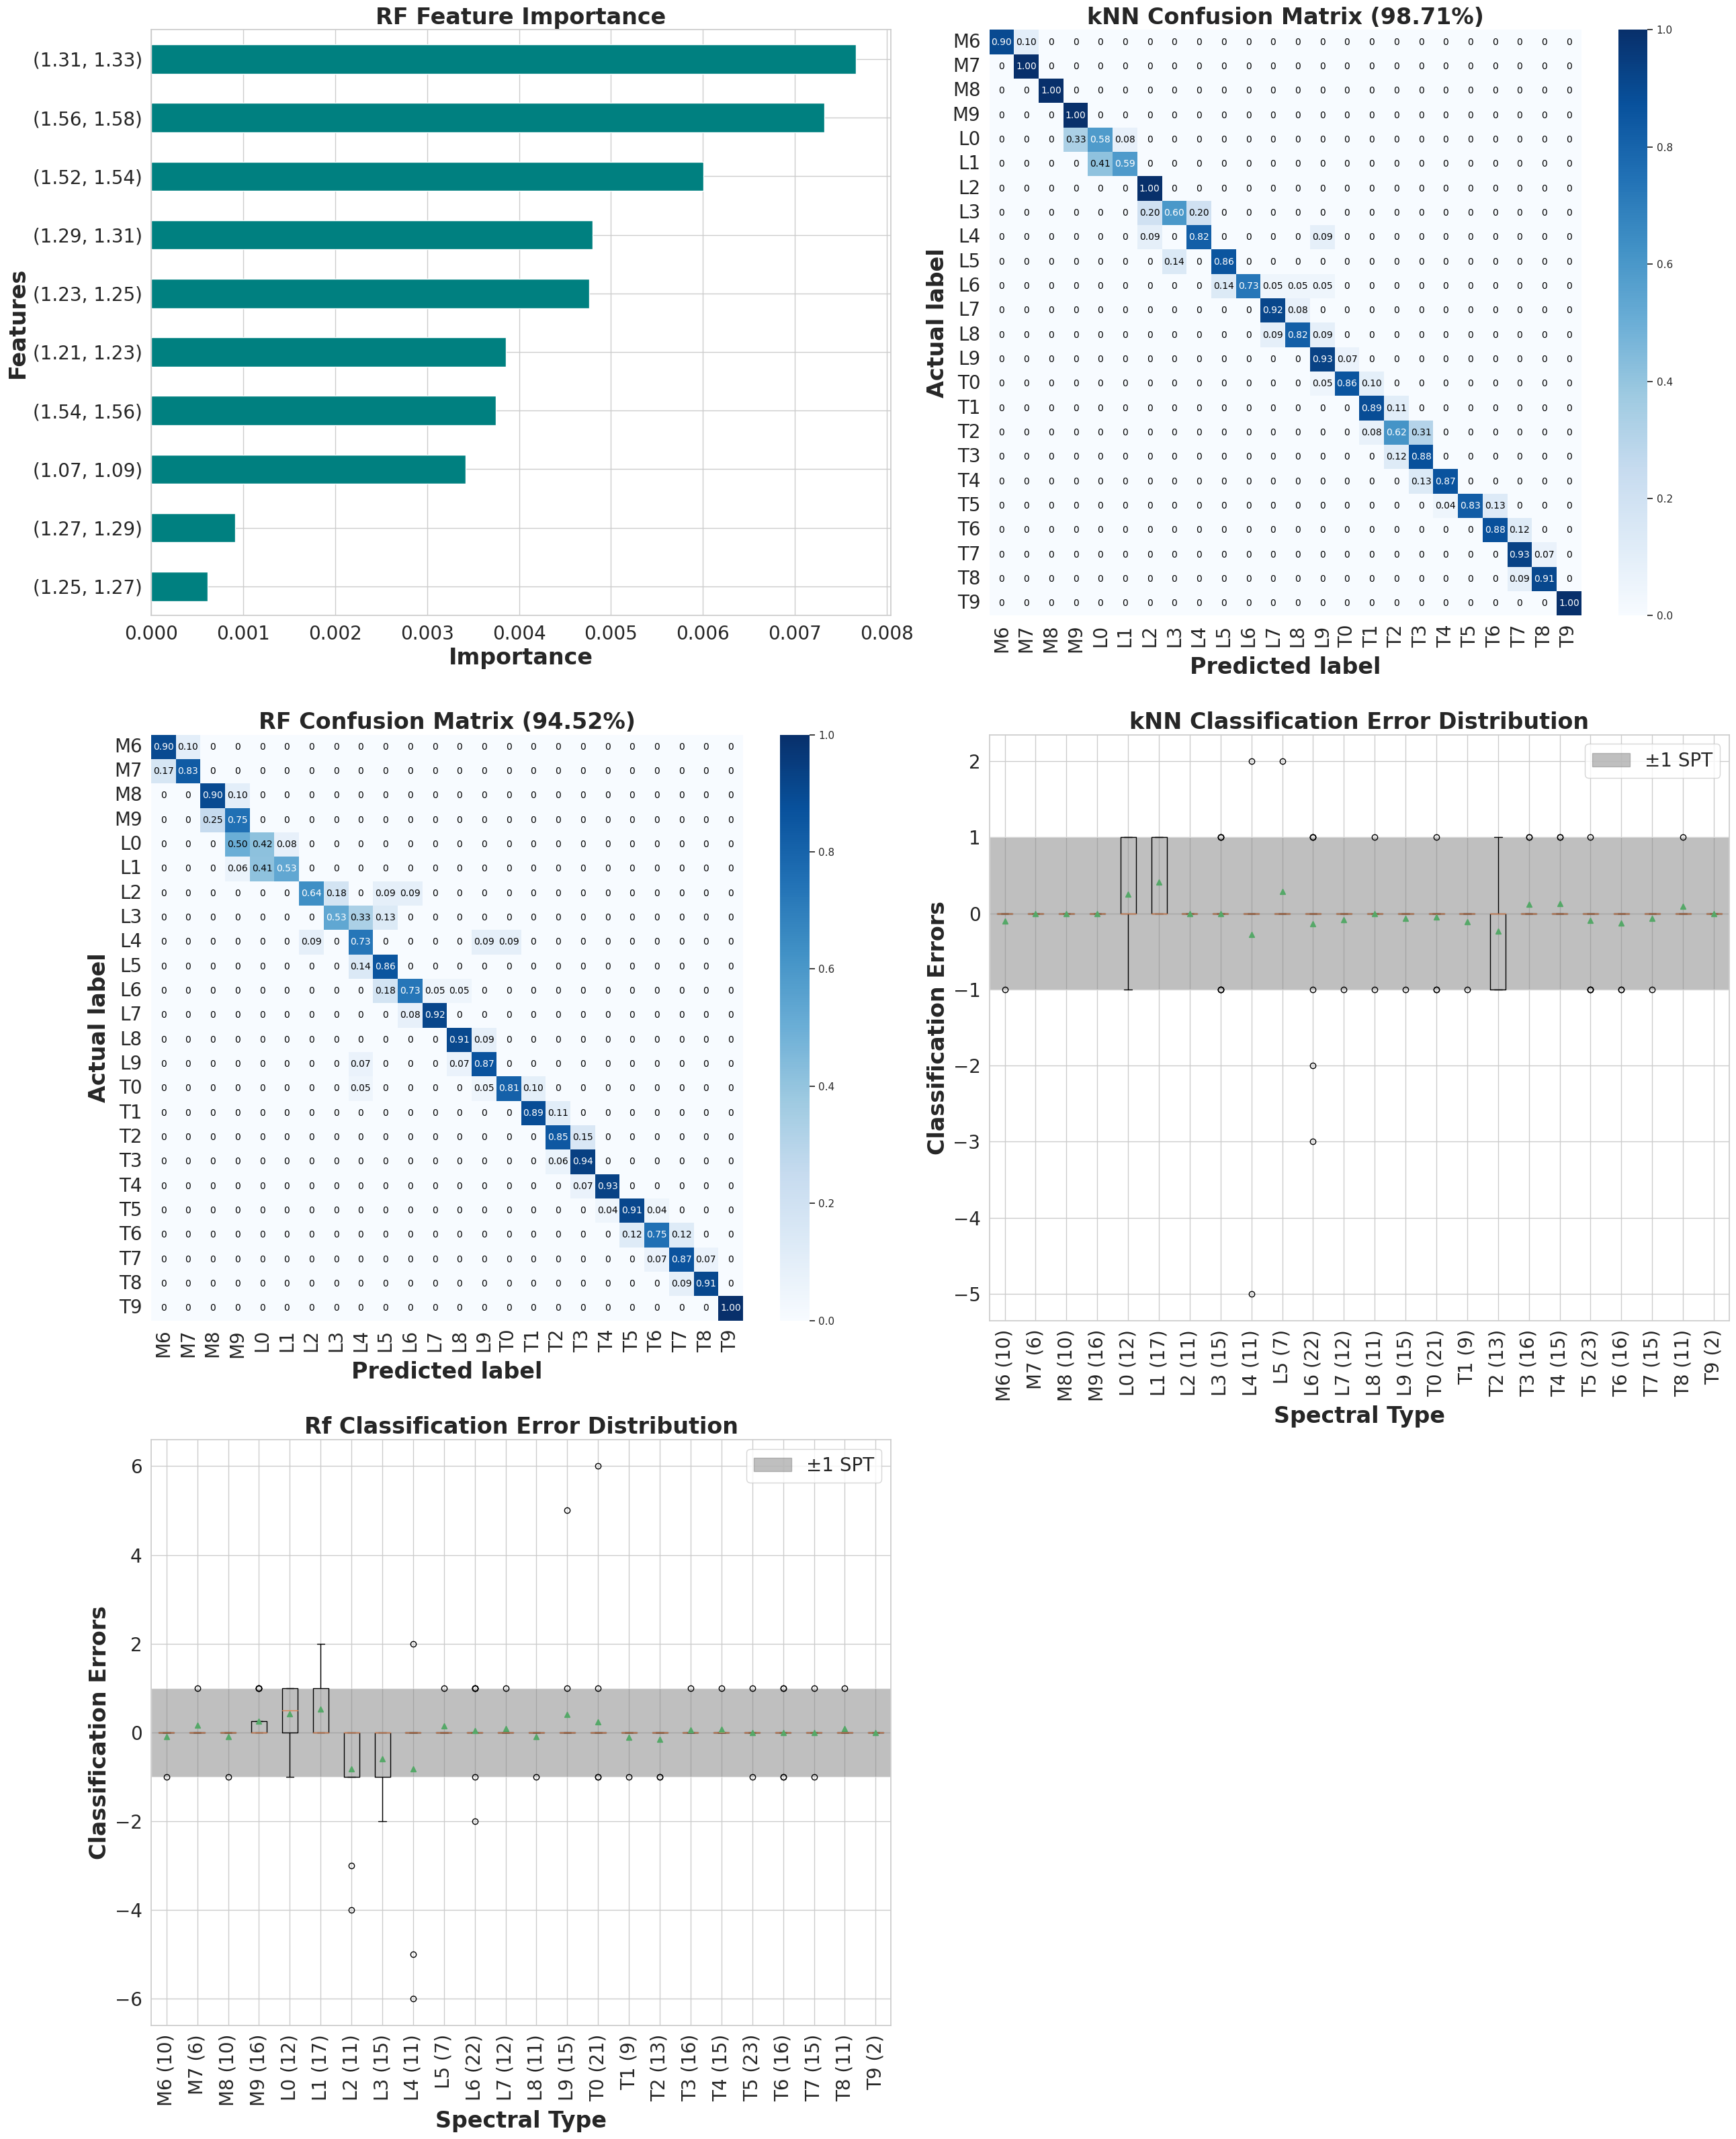

In [86]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}

spectral_types = [
               'M6', 'M7', 'M8', 'M9', 'L0', 'L1',
               'L2', 'L3', 'L4', 'L5', 'L6', 'L7',
               'L8', 'L9', 'T0', 'T1', 'T2', 'T3',
               'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

test_labels = np.unique(test_y)

# Remove labels not in the test set from spectral_types
spectral_types = [label for label in spectral_types if label in test_labels]

# Convert the actual and predicted spectra to integers
test_y_int = np.array([type_to_int[s] for s in test_y])
y_pred_int_knn = np.array([type_to_int[s] for s in Y_pred])
y_pred_int_rf = np.array([type_to_int[s] for s in y_preds])

# Collect the errors for each subtype and count the number of objects in each subtype
errors_list_knn = []
errors_list_rf = []
subtype_counts = []
for i, s in enumerate(spectral_types):
    indices = np.where(test_y_int == type_to_int[s])[0]
    if len(indices) > 0:
        errors_knn = test_y_int[indices] - y_pred_int_knn[indices]
        errors_rf = test_y_int[indices] - y_pred_int_rf[indices]
        errors_list_knn.append(errors_knn)
        errors_list_rf.append(errors_rf)
        subtype_counts.append(len(indices))
    else:
        errors_list_knn.append(np.array([]))
        errors_list_rf.append(np.array([]))
        subtype_counts.append(0)

# Update the labels with the number of objects in each subtype
updated_labels = [f"{s} ({count})" for s, count in zip(spectral_types, subtype_counts)]

fig, axs = plt.subplots(3, 2, figsize=(26,32))  # 3 rows, 2 columns

feature_scores = pd.Series(forest_model.feature_importances_, index=df_features).sort_values(ascending=True)
selected_features_spectral = feature_scores.head(10)

# Random Forest Feature Importance (First subplot in the first column)
selected_features_spectral.plot(kind='barh', color='teal', ax=axs[0, 0])
axs[0, 0].set_title('RF Feature Importance', fontsize=24, fontweight='bold')
axs[0, 0].tick_params(axis='both', which='major', labelsize=20)
axs[0, 0].set_ylabel('Features', fontsize=24, fontweight='bold')
axs[0, 0].set_xlabel('Importance', fontsize=24, fontweight='bold')

# Function to format the annotations
def format_ratio(val):
    if val == 0:
        return '0'
    else:
        return f"{val:.2f}"

def plot_confusion_matrix(ax, cm, labels):
    sns.heatmap(cm, annot=False, cmap='Blues', ax=ax, cbar=True)
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels, rotation=360)

 # Manually set the annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ratio = cm[i, j] / cm[i, :].sum()
            text = format_ratio(ratio)
            color = 'white' if ratio > 0.5 else 'black'  # Adjust the threshold as needed
            ax.text(j + 0.5, i + 0.5, text, fontsize=10, ha='center', va='center', color=color)

# Calculate the ratio for Random Forest Confusion Matrix
cm_rf = confusion_matrix(test_y, y_preds, labels=spectral_types)
cm_rf_ratio = (cm_rf / cm_rf.sum(axis=1)[:, np.newaxis])
plot_confusion_matrix(axs[1, 0], cm_rf_ratio, spectral_types)
axs[1, 0].set_title('RF Confusion Matrix (94.52%)', fontsize=24, fontweight='bold')
axs[1, 0].set_ylabel('Actual label', fontsize=24, fontweight='bold')
axs[1, 0].set_xlabel('Predicted label', fontsize=24, fontweight='bold')
axs[1, 0].tick_params(axis='both', which='major', labelsize=20)
#axs[1, 0].set_yticklabels(labels=spectral_types, rotation=90)

# Random Forest Box Plot (Third subplot in the first column)
axs[2, 0].boxplot(errors_list_rf, showmeans=True)
axs[2, 0].set_xticklabels(updated_labels, rotation=90, fontsize=12)
axs[2, 0].set_xlabel('Spectral Type', fontsize=24, fontweight='bold')
axs[2, 0].set_ylabel('Classification Errors', fontsize=24, fontweight='bold')
axs[2, 0].set_title('Rf Classification Error Distribution', fontsize=24, fontweight='bold')
axs[2, 0].axhspan(-1, 1, facecolor='grey', alpha=0.5)
axs[2, 0].legend(handles=[legend_patch], fontsize=20)
axs[2, 0].tick_params(axis='both', which='major', labelsize=20)

# Calculate the ratio for kNN Confusion Matrix
cm_knn_subplot = confusion_matrix(test_y, Y_pred, labels=spectral_types)
cm_knn_ratio = (cm_knn_subplot / cm_knn_subplot.sum(axis=1)[:, np.newaxis])
plot_confusion_matrix(axs[0, 1], cm_knn_ratio, spectral_types)
axs[0, 1].set_title('kNN Confusion Matrix (98.71%)', fontsize=24, fontweight='bold')
axs[0, 1].set_ylabel('Actual label', fontsize=24, fontweight='bold')
axs[0, 1].set_xlabel('Predicted label', fontsize=24, fontweight='bold')
axs[0, 1].tick_params(axis='both', which='major', labelsize=20)
#axs[0, 1].set_yticklabels(labels=spectral_types, rotation=90)

axs[1, 1].boxplot(errors_list_knn, showmeans=True)
axs[1, 1].set_xticklabels(updated_labels, rotation=90, fontsize=12)
axs[1, 1].set_xlabel('Spectral Type', fontsize=24, fontweight='bold')
axs[1, 1].set_ylabel('Classification Errors', fontsize=24, fontweight='bold')
axs[1, 1].set_title('kNN Classification Error Distribution', fontsize=24, fontweight='bold')
axs[1, 1].axhspan(-1, 1, facecolor='grey', alpha=0.5)
axs[1, 1].legend(handles=[legend_patch], fontsize=20)
axs[1, 1].tick_params(axis='both', which='major', labelsize=20)
axs[2, 1].axis('off')
# Adjust layout and save
plt.tight_layout()
plt.savefig('combined_plot.pdf')
plt.show()

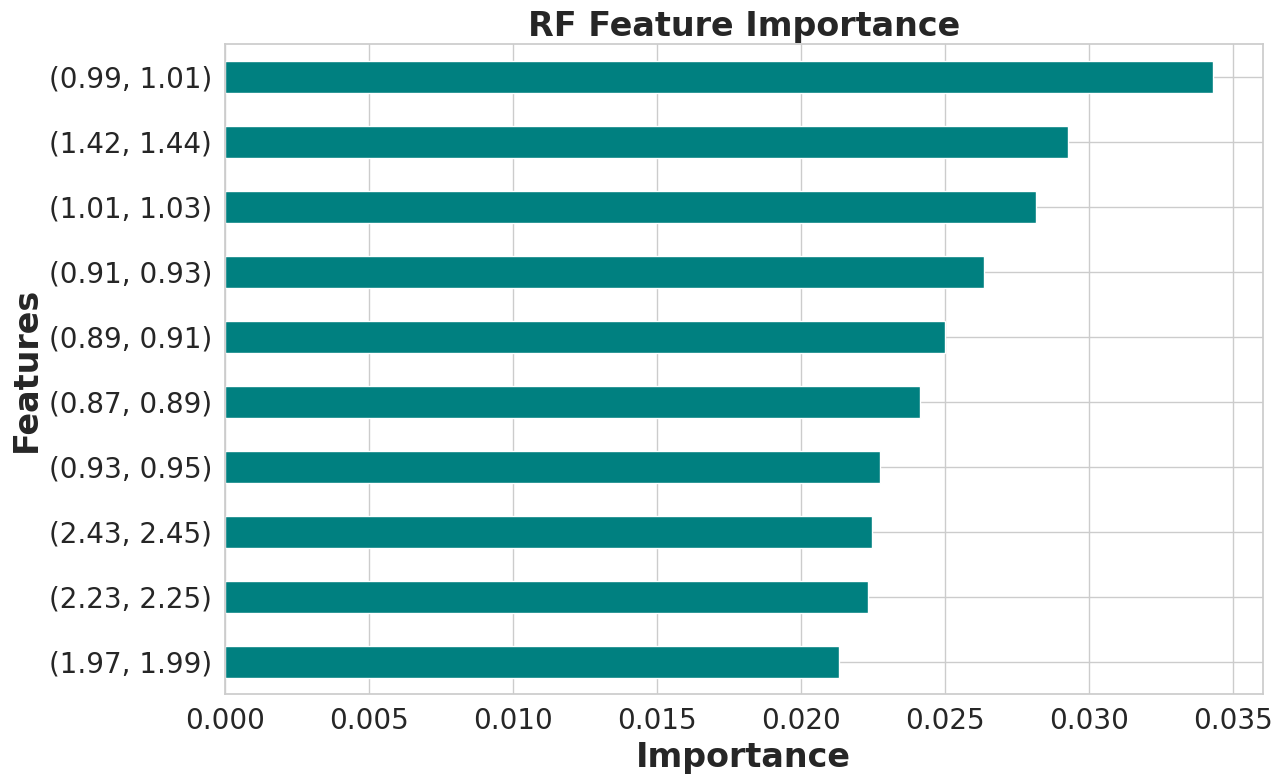

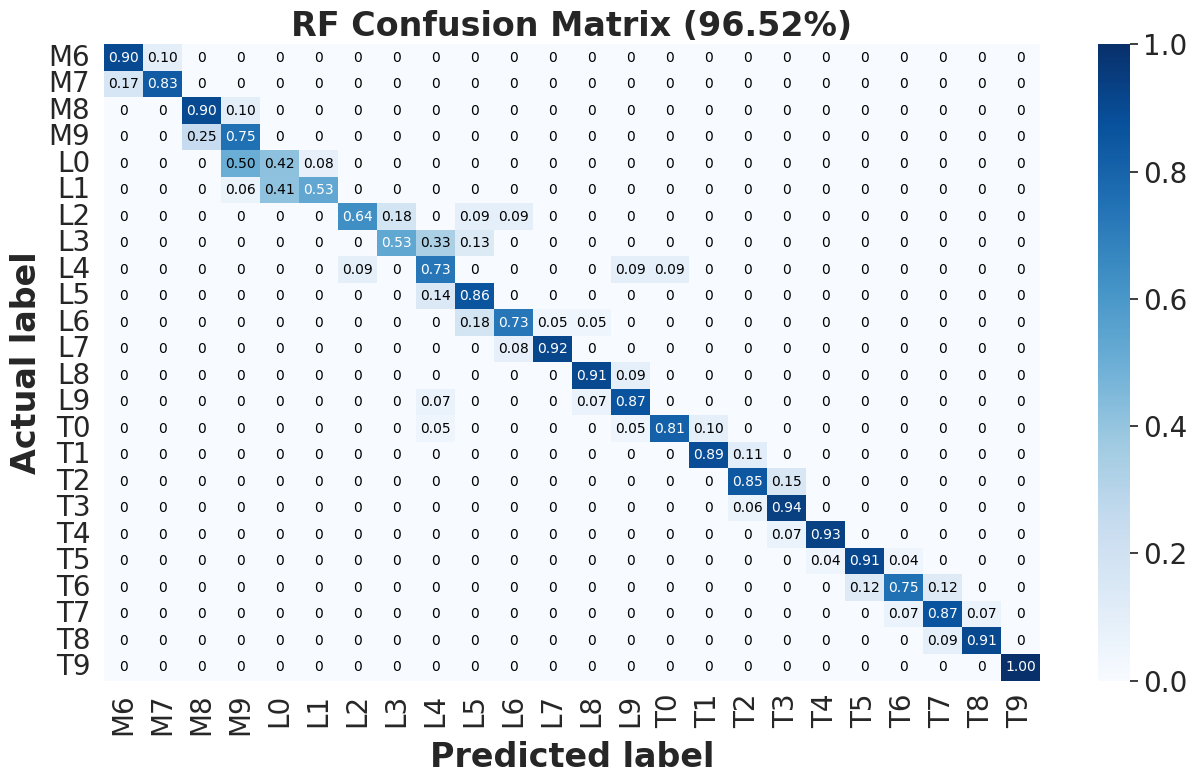

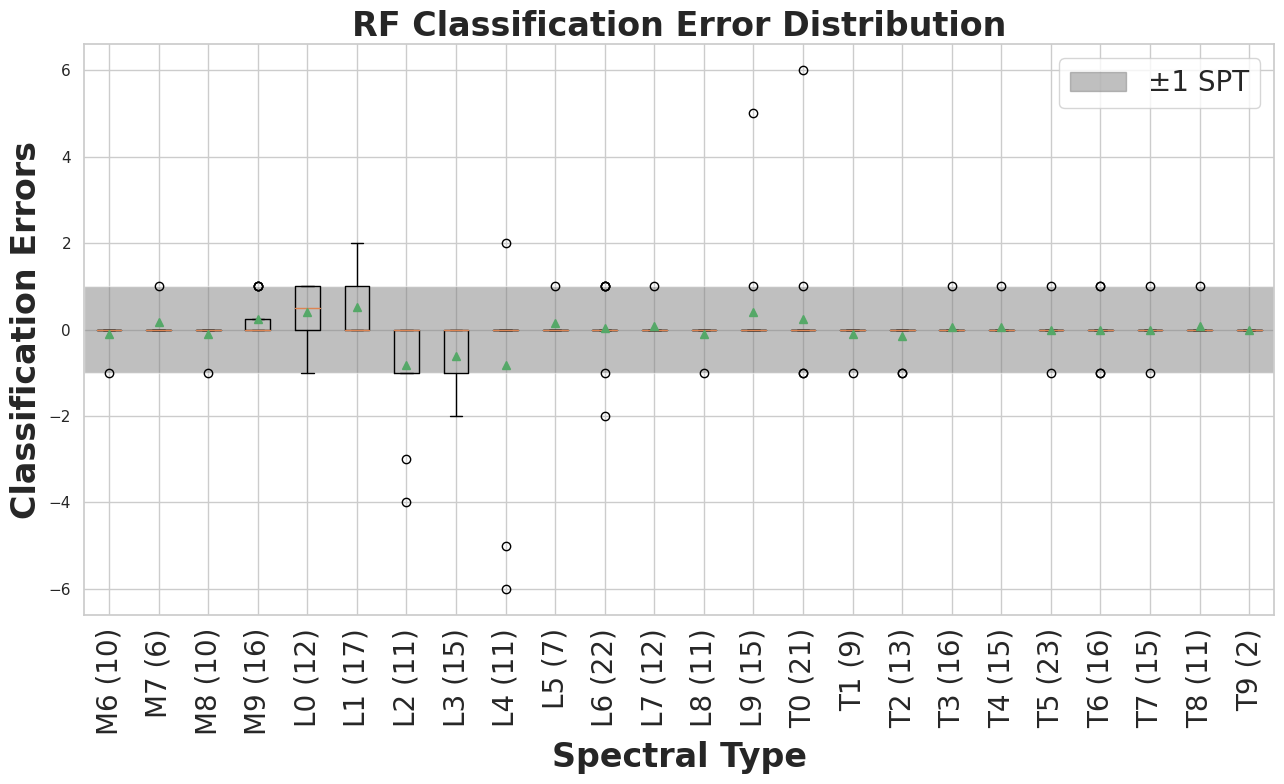

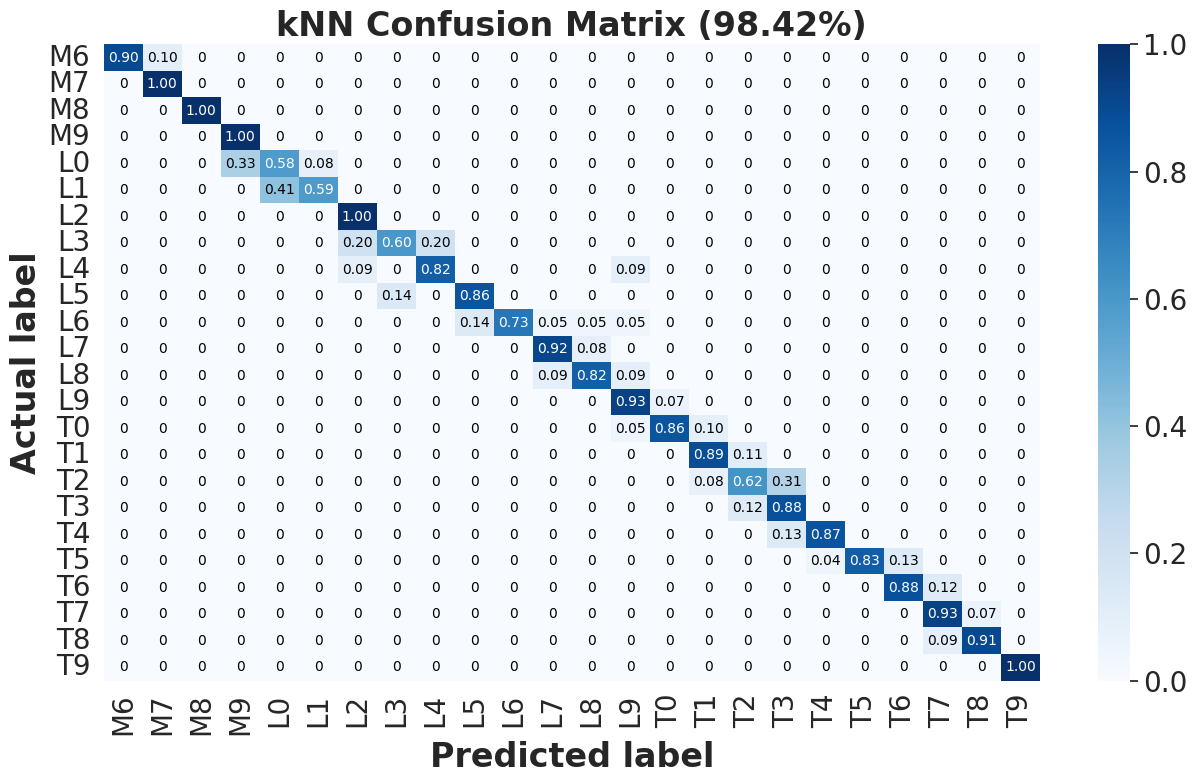

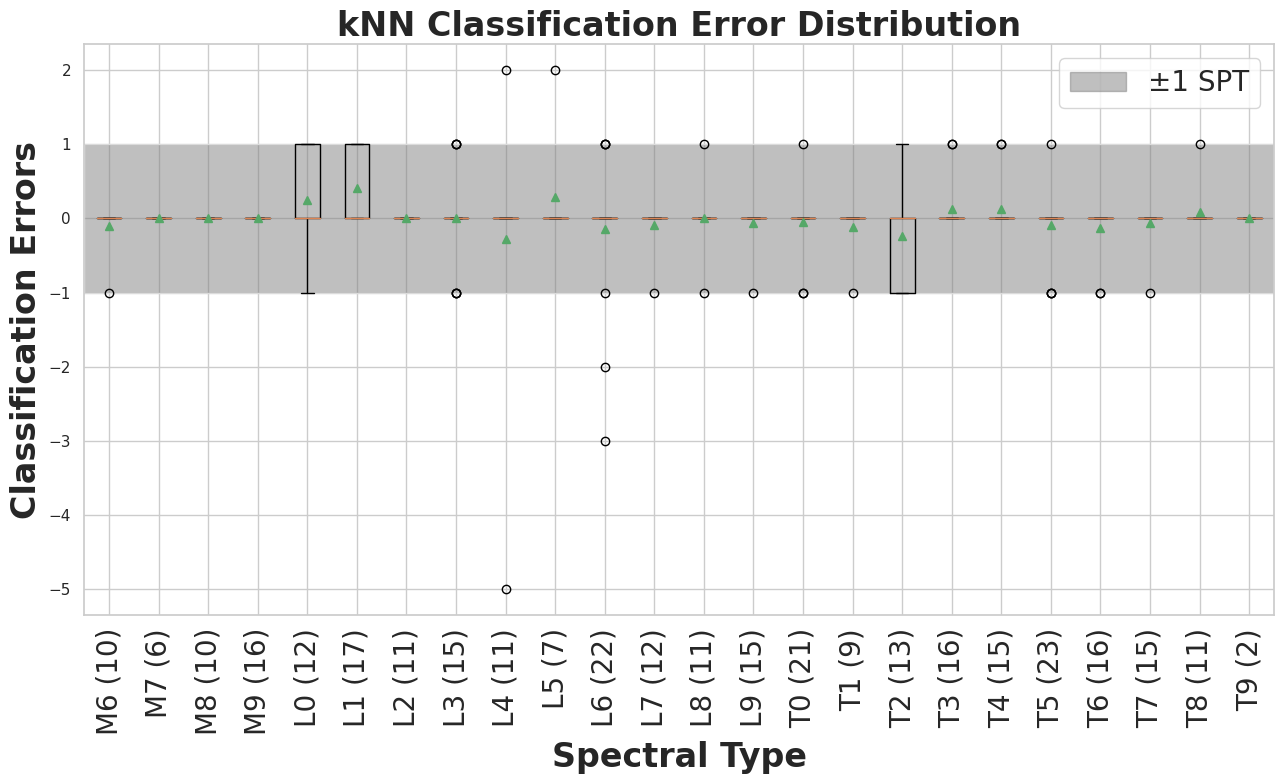

In [90]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}

spectral_types = [
               'M6', 'M7', 'M8', 'M9', 'L0', 'L1',
               'L2', 'L3', 'L4', 'L5', 'L6', 'L7',
               'L8', 'L9', 'T0', 'T1', 'T2', 'T3',
               'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

test_labels = np.unique(test_y)

# Remove labels not in the test set from spectral_types
spectral_types = [label for label in spectral_types if label in test_labels]

# Convert the actual and predicted spectra to integers
test_y_int = np.array([type_to_int[s] for s in test_y])
y_pred_int_knn = np.array([type_to_int[s] for s in Y_pred])
y_pred_int_rf = np.array([type_to_int[s] for s in y_preds])

# Collect the errors for each subtype and count the number of objects in each subtype
errors_list_knn = []
errors_list_rf = []
subtype_counts = []
for i, s in enumerate(spectral_types):
    indices = np.where(test_y_int == type_to_int[s])[0]
    if len(indices) > 0:
        errors_knn = test_y_int[indices] - y_pred_int_knn[indices]
        errors_rf = test_y_int[indices] - y_pred_int_rf[indices]
        errors_list_knn.append(errors_knn)
        errors_list_rf.append(errors_rf)
        subtype_counts.append(len(indices))
    else:
        errors_list_knn.append(np.array([]))
        errors_list_rf.append(np.array([]))
        subtype_counts.append(0)

# Update the labels with the number of objects in each subtype
updated_labels = [f"{s} ({count})" for s, count in zip(spectral_types, subtype_counts)]

feature_scores = pd.Series(forest_model.feature_importances_, index=df_features).sort_values(ascending=False)
selected_features_spectral = feature_scores.head(10).iloc[::-1]

# Function to format the annotations
def format_ratio(val):
    if val == 0:
        return '0'
    else:
        return f"{val:.2f}"

def plot_confusion_matrix(ax, cm, labels):
#    sns.heatmap(cm, annot=False, cmap='Blues', ax=ax, cbar=True)
    cbar_ax = sns.heatmap(cm, annot=False, cmap='Blues', ax=ax, cbar=True)
    cbar = cbar_ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)  # Set font size here
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels, rotation=360)

 # Manually set the annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ratio = cm[i, j] / cm[i, :].sum()
            text = format_ratio(ratio)
            color = 'white' if ratio > 0.5 else 'black'  # Adjust the threshold as needed
            ax.text(j + 0.5, i + 0.5, text, fontsize=10, ha='center', va='center', color=color)

# Function to save and show individual plots
def save_and_show_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

cm_rf = confusion_matrix(test_y, y_preds, labels=spectral_types)
cm_rf_ratio = (cm_rf / cm_rf.sum(axis=1)[:, np.newaxis])

# 1. RF Feature Importance
plt.figure(figsize=(13, 8))
selected_features_spectral.plot(kind='barh', color='teal')
plt.title('RF Feature Importance', fontsize=24, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Features', fontsize=24, fontweight='bold')
plt.xlabel('Importance', fontsize=24, fontweight='bold')
save_and_show_plot('Top 10 rf_feature_importance.pdf')

# 2. RF Confusion Matrix
plt.figure(figsize=(13, 8))
plot_confusion_matrix(plt.gca(), cm_rf_ratio, spectral_types)
plt.title('RF Confusion Matrix (96.52%)', fontsize=24, fontweight='bold')
plt.ylabel('Actual label', fontsize=24, fontweight='bold')
plt.xlabel('Predicted label', fontsize=24, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
save_and_show_plot('rf_confusion_matrix.pdf')

# 3. RF Classification Error Distribution
plt.figure(figsize=(13, 8))
plt.boxplot(errors_list_rf, showmeans=True)
plt.xticks(ticks=np.arange(1, len(updated_labels) + 1), labels=updated_labels, rotation=90, fontsize=20)
plt.xlabel('Spectral Type', fontsize=24, fontweight='bold')
plt.ylabel('Classification Errors', fontsize=24, fontweight='bold')
plt.title('RF Classification Error Distribution', fontsize=24, fontweight='bold')
plt.axhspan(-1, 1, facecolor='grey', alpha=0.5)
plt.legend(handles=[legend_patch], fontsize=20)
save_and_show_plot('rf_classification_error_distribution.pdf')

# 4. kNN Confusion Matrix
cm_knn_subplot = confusion_matrix(test_y, Y_pred, labels=spectral_types)
cm_knn_ratio = (cm_knn_subplot / cm_knn_subplot.sum(axis=1)[:, np.newaxis])
plt.figure(figsize=(13, 8))
plot_confusion_matrix(plt.gca(), cm_knn_ratio, spectral_types)
plt.title('kNN Confusion Matrix (98.42%)', fontsize=24, fontweight='bold')
plt.ylabel('Actual label', fontsize=24, fontweight='bold')
plt.xlabel('Predicted label', fontsize=24, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
save_and_show_plot('knn_confusion_matrix.pdf')

# 5. kNN Classification Error Distribution
plt.figure(figsize=(13, 8))
plt.boxplot(errors_list_knn, showmeans=True)
plt.xticks(ticks=np.arange(1, len(updated_labels) + 1), labels=updated_labels, rotation=90, fontsize=20)
plt.xlabel('Spectral Type', fontsize=24, fontweight='bold')
plt.ylabel('Classification Errors', fontsize=24, fontweight='bold')
plt.title('kNN Classification Error Distribution', fontsize=24, fontweight='bold')
plt.axhspan(-1, 1, facecolor='grey', alpha=0.5)
plt.legend(handles=[legend_patch], fontsize=20)
save_and_show_plot('knn_classification_error_distribution.pdf')